**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

In [1]:
import numpy as np
import pandas as pd

#### Execute the below cell to load the datasets

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Abhyuday\Anaconda3\lib\site-packages\IPython\core\interactiveshel

### Check no.of records and features given in each dataset

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books=books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


**yearOfPublication**

### Check unique values of yearOfPublication


In [10]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
books.loc[books['yearOfPublication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [12]:
books=books.drop([books.index[209538],books.index[220731],books.index[221678]])

### Change the datatype of yearOfPublication to 'int'

In [13]:
books['yearOfPublication']=books['yearOfPublication'].astype('int')

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


### Drop NaNs in `'publisher'` column


In [15]:
books.loc[books['publisher'].isin(['NaN'])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


## Exploring Users dataset

In [16]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [17]:
users['Age'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [18]:
def function(x):
    if x<5. or x>90.:
        x=np.nan
    else:
        x=x
        return(x)
        


In [19]:
users["Age"]=users["Age"].transform(function)
users.Age.sort_values().unique()

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., nan])

### Replace null values in column `Age` with mean

In [20]:
users['Age']=users["Age"].fillna(users['Age'].mean())

### Change the datatype of `Age` to `int`

In [21]:
users["Age"]=users["Age"].astype("int")

In [22]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [23]:
ratings.shape

(1149780, 3)

In [24]:
n_users = users.shape[0]
n_books = books.shape[0]

In [25]:
 (ratings.head())

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [26]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [27]:

print (books.shape)
print (ratings.shape)


(271357, 5)
(1149780, 3)


In [28]:
print(books.info())
print("******************************")
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB
None
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


In [29]:
df= pd.merge(books,ratings,on="ISBN",how="left")
df

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0
...,...,...,...,...,...,...,...
1032336,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0
1032337,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579.0,4.0
1032338,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680.0,0.0
1032339,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680.0,0.0


In [30]:
ratings=df[['ISBN','userID','bookRating']]

In [31]:
ratings

,ISBN,userID,bookRating
0,0195153448,2.0,0.0
1,0002005018,8.0,5.0
2,0002005018,11400.0,0.0
3,0002005018,11676.0,8.0
4,0002005018,41385.0,0.0
...,...,...,...
1032336,0440400988,276463.0,7.0
1032337,0525447644,276579.0,4.0
1032338,006008667X,276680.0,0.0
1032339,0192126040,276680.0,0.0


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [32]:
print(users.info())
print('********************************')
print(ratings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB
None
********************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032341 entries, 0 to 1032340
Data columns (total 3 columns):
ISBN          1032341 non-null object
userID        1031132 non-null float64
bookRating    1031132 non-null float64
dtypes: float64(2), object(1)
memory usage: 31.5+ MB
None


In [33]:
df2= pd.merge(users,ratings,on="userID",how="left")
df2

,userID,Location,Age,ISBN,bookRating
0,1,"nyc, new york, usa",34,NaN,NaN
1,2,"stockton, california, usa",18,0195153448,0.0
2,3,"moscow, yukon territory, russia",34,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17,NaN,NaN
4,5,"farnborough, hants, united kingdom",34,NaN,NaN
...,...,...,...,...,...
1217879,278854,"portland, oregon, usa",34,0425163393,7.0
1217880,278855,"tacoma, washington, united kingdom",50,NaN,NaN
1217881,278856,"brampton, ontario, canada",34,NaN,NaN
1217882,278857,"knoxville, tennessee, usa",34,NaN,NaN


In [34]:
ratings=df2[['userID','ISBN','bookRating']]
ratings=ratings.dropna()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031132 entries, 1 to 1217879
Data columns (total 3 columns):
userID        1031132 non-null int64
ISBN          1031132 non-null object
bookRating    1031132 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.5+ MB


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [35]:
ratings_final=ratings[ratings.bookRating!=0]
ratings_final.sort_values(by='bookRating')

,userID,ISBN,bookRating
329688,76499,1583224890,1.0
937175,216444,0345361881,1.0
1014768,233911,0440175402,1.0
158094,35859,0553276085,1.0
431675,99314,0571216420,1.0
...,...,...,...
138538,31826,0789499142,10.0
138539,31826,0878578129,10.0
138540,31826,0878579710,10.0
138517,31826,037581017X,10.0


### Find out which rating has been given highest number of times

(array([ 1481.,  2375.,  5118.,  7617., 45355., 31687., 66401., 91804.,
        60778., 71225.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

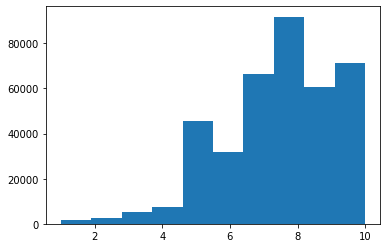

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(ratings_final['bookRating'])

In [37]:
ratings_final['bookRating'].value_counts()

8.0     91804
10.0    71225
7.0     66401
9.0     60778
5.0     45355
6.0     31687
4.0      7617
3.0      5118
2.0      2375
1.0      1481
Name: bookRating, dtype: int64

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [38]:
[ratings_final['userID'].value_counts()>100]

[11676      True
 98391      True
 189835     True
 153662     True
 23902      True
           ...  
 148684    False
 124088    False
 105655    False
 103606    False
 211175    False
 Name: userID, Length: 68091, dtype: bool]

In [55]:
ratings_final=ratings_final.groupby('userID').filter(lambda x : (x['userID'].count()>=100).any())
ratings_final.head()

,userID,ISBN,bookRating
5323,2033,0142000663,10.0
5324,2033,0836218256,9.0
5327,2033,0030020786,7.0
5328,2033,0133502813,10.0
5329,2033,0716724022,7.0


In [50]:
ratings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103271 entries, 5323 to 1216904
Data columns (total 3 columns):
userID        103271 non-null int64
ISBN          103271 non-null object
bookRating    103271 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
trainDF,tempDF=train_test_split(ratings_final,test_size=0.2,random_state=77)

In [54]:
testDF=tempDF.copy()

In [56]:
tempDF.bookRating=np.nan

In [59]:
ratings_new=pd.concat([trainDF,tempDF]).reset_index()

In [60]:
ratings_new

,index,userID,ISBN,bookRating
0,213459,49144,8401327636,5.0
1,967615,224646,0141300280,7.0
2,1164536,266056,0061096083,8.0
3,424114,98391,0312311435,9.0
4,943022,217740,9580458499,6.0
...,...,...,...,...
103266,20589,6575,0312980140,NaN
103267,901771,208406,1558744215,NaN
103268,400358,93363,1582293082,NaN
103269,168237,36836,1578400031,NaN


In [61]:
U_df=ratings_new.pivot(index='userID', columns='ISBN',values='bookRating').fillna(0)

In [73]:
U_df.tail()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
U_df.shape

(449, 66574)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [64]:
from scipy.sparse.linalg import svds

In [65]:
u,sigma,Vt=svds(U_df,k=50)

In [67]:
sigma=np.diag(sigma)

In [68]:
user_pred_ratings=np.dot(np.dot(u,sigma),Vt)

In [69]:
preds_df=pd.DataFrame(user_pred_ratings,columns=U_df.columns)

In [76]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.031669,-0.000022,0.0,-0.000022,-0.000022,0.004868,0.000312,0.0,-0.006185,0.019887,...,0.000705,0.002128,0.052583,-0.013110,0.0,0.006525,0.019691,0.000470,0.002570,-0.037720
1,-0.008619,-0.002694,0.0,-0.002694,-0.002694,0.001441,0.002424,0.0,-0.001661,0.002890,...,-0.000374,0.000562,0.011810,-0.007457,0.0,0.001626,0.002527,-0.000249,0.000458,-0.009727
2,-0.016294,-0.004784,0.0,-0.004784,-0.004784,0.001021,-0.002231,0.0,-0.001675,0.003943,...,-0.000373,0.000443,0.014856,0.004987,0.0,0.000872,0.003195,-0.000249,0.001349,-0.031093
3,-0.020735,0.013950,0.0,0.013950,0.013950,0.023964,-0.009333,0.0,0.010319,0.055592,...,0.000433,0.005848,0.104891,0.005169,0.0,0.015789,0.012781,0.000289,0.011099,-0.002520
4,-0.016378,-0.032020,0.0,-0.032020,-0.032020,0.020614,-0.033231,0.0,0.002611,0.048984,...,0.000132,0.014051,0.041684,-0.010316,0.0,0.015016,-0.015313,0.000088,0.027926,-0.029500


In [72]:
preds_df.shape

(449, 66574)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [77]:
userID = 2110

In [78]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [79]:
user_row_num=user_id-1
sorted_user_predictions = preds_df.loc[user_row_num].sort_values(ascending = False)

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [80]:
user_data = ratings_new[ratings_new.userID == (userID)]

In [81]:
user_data.head()

,index,userID,ISBN,bookRating
308,5713,2110,0679023755,8.0
1192,5766,2110,1570420564,10.0
1195,5808,2110,0373638078,9.0
2647,5705,2110,0451077237,8.0
6174,5815,2110,0590879979,9.0


In [82]:
user_data.shape

(103, 4)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [84]:
book_data=books

In [85]:
book_data.shape

(271357, 5)

In [86]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [89]:
user_full_info = (user_data.merge(book_data, how = 'left', left_on = 'ISBN', right_on = 'ISBN').sort_values(['bookRating'], ascending = False))

In [90]:
user_full_info.head()

,index,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
41,5727,2110,0590629786,10.0,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
29,5708,2110,0345260627,10.0,Splinter of the Mind's Eye,Alan Dean Foster,1978,Ballantine Books
20,5695,2110,0812505042,10.0,The Time Machine,H. G. Wells,1995,Tor Books
62,5738,2110,0345314255,10.0,Sword of Shannara,Terry Brooks,1995,Del Rey Books
60,5699,2110,0590629808,10.0,"The Message (Animorphs , No 4)",K. A. Applegate,1996,Scholastic


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [93]:
num_recommendations=10 
recommendations = (book_data[~book_data['ISBN'].isin(user_full_info['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_num: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])

In [96]:
recommendations

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
37,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
13679,0345367693,Diamond Throne (Elenium (Paperback)),David Eddings,1990,Del Rey
54653,0880389117,Flint the King (Dragonlance: Preludes),Mary Kirchoff,1990,Wizards of the Coast


In [ ]:
#The above are the top 10 books recommended. 